In [1]:
# install dash library
!pip install dash

In [2]:
# import libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import dash
from dash import html, dcc, Input, Output

In [3]:
# import dataset and show head of dataset

df_raw = pd.read_csv('./project_1_python.csv')
df_raw.head()

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [4]:
# show info of dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [5]:
# change date column to datetime format
df_raw['date'] = pd.to_datetime(df_raw['date'], format='%Y-%m-%d')


In [6]:
# check datatypes of columns with new data type in date column
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    180477 non-null  int64         
 1   iso_code                 180477 non-null  object        
 2   continent                180477 non-null  object        
 3   location                 180477 non-null  object        
 4   date                     180477 non-null  datetime64[ns]
 5   total_cases              173493 non-null  float64       
 6   new_cases                173212 non-null  float64       
 7   total_deaths             155323 non-null  float64       
 8   new_deaths               155095 non-null  float64       
 9   hosp_patients            27152 non-null   float64       
 10  total_tests              78326 non-null   float64       
 11  new_tests                74509 non-null   float64       
 12  tests_per_case  

In [7]:
# check for missing values
print("Missing values per column:\n")
print(df_raw.isnull().sum())

Missing values per column:

index                           0
iso_code                        0
continent                       0
location                        0
date                            0
total_cases                  6984
new_cases                    7265
total_deaths                25154
new_deaths                  25382
hosp_patients              153325
total_tests                102151
new_tests                  105968
tests_per_case              87877
total_vaccinations         134111
people_vaccinated          136626
people_fully_vaccinated    138953
total_boosters             160611
new_vaccinations           143537
population                      0
median_age                  21151
gdp_per_capita              22483
life_expectancy              1051
latitude                        0
longitude                       0
dtype: int64


In [8]:
# check for notnull values
print("Notnull values per column:\n")
print(df_raw.notnull().sum())

Notnull values per column:

index                      180477
iso_code                   180477
continent                  180477
location                   180477
date                       180477
total_cases                173493
new_cases                  173212
total_deaths               155323
new_deaths                 155095
hosp_patients               27152
total_tests                 78326
new_tests                   74509
tests_per_case              92600
total_vaccinations          46366
people_vaccinated           43851
people_fully_vaccinated     41524
total_boosters              19866
new_vaccinations            36940
population                 180477
median_age                 159326
gdp_per_capita             157994
life_expectancy            179426
latitude                   180477
longitude                  180477
dtype: int64


/var/folders/47/tpj_wbtj6wj_l1qcwsyzlhn40000gn/T/ipykernel_98880/2973841242.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart_of_population.set_xticklabels(chart_of_population.get_xticklabels(), rotation=60)


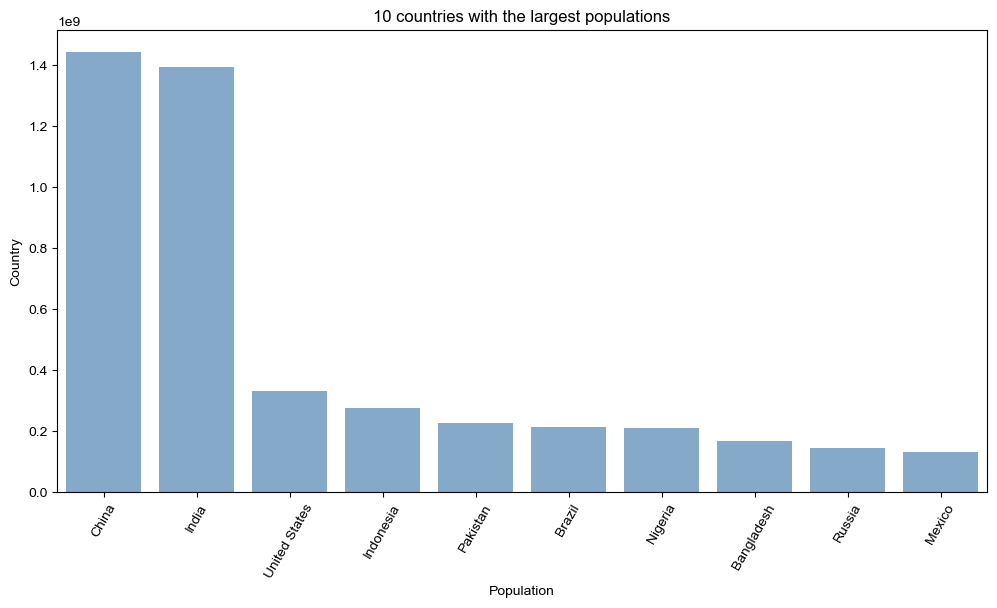

In [9]:
# Project #1 - first visualization


# create a new dataframe with columns location and population
df_population = df_raw[['location', 'population']]

# drop duplicates
df_population = df_population.drop_duplicates()

# sort values by population in descending order and take the first 10 rows
df_population = df_population.sort_values(by='population', ascending=False).head(10)

# create a bar plot
plt.figure(figsize=(12, 6))
chart_of_population = sns.barplot(
    						data=df_population, 
    						x='location',
							y='population', 
    						color='#7AA9D4')  # this color is visible for colorblind people
sns.set_style('whitegrid')
plt.title('10 countries with the largest populations')
plt.xlabel('Population')
plt.ylabel('Country')
# rotate x-axis labels
chart_of_population.set_xticklabels(chart_of_population.get_xticklabels(), rotation=60)

# show the plot
plt.show()

In [10]:
# Project #1 - population vs. life expectancy


# create a new dataframe with columns location, population and life_expectancy and drop duplicates
df_population_explife = df_raw[['continent', 'location', 'population', 'life_expectancy']].drop_duplicates()

#create a scatter plot
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]

chart_of_population_explife = px.scatter(
	data_frame=df_population_explife, 
	x='population',
	y='life_expectancy',
	color='continent',
	color_discrete_sequence=color_palette,
    title='Population vs. Life Expectancy by Country and Continent',
    labels={'population': 'Population', 'life_expectancy': 'Life Expectancy', 'continent': 'Continent'},
    log_x=True,  # logarithmic scale on x-axis
    height=600,
    width=1000
    )

# show the plot
chart_of_population_explife

In [11]:
# Project #1 - number of diagnosed cases

# create a new dataframe with columns location, date and new_cases and drop duplicates
df_diagnosed = df_raw[['location', 'date', 'new_cases']].drop_duplicates()

# group by location and date and sum the number of new cases
df_diagnosed = df_diagnosed.groupby(['location', 'date']).sum().reset_index()

# create a line plot for Poland and Czechia
new_cases_chart = px.area(
    data_frame=df_diagnosed[df_diagnosed['location'].isin(['Poland', 'Czechia'])], 
	x='date', 
	y='new_cases', 
	color='location',
    color_discrete_sequence=color_palette,
	title='Number of diagnosed cases per day in Czechia and Poland',
	labels={'new_cases': 'Number of diagnosed cases', 'date': 'Date'},
    height=600,
    width=1000
	)

# show the plot
new_cases_chart

In [12]:
# Project #1 - COVID-19 map

# my mapbox token
my_mapbox_token = 'pk.eyJ1IjoibHVra3V0dGxlci04MiIsImEiOiJjbTZhcDl5dHgwMDFpMmlzNnk5dnRpaTVtIn0.LnpX1RAO-6DJSynD6eX2fw'

# create dataframe with max date in the dataset fo all locations
df_maps = df_raw.loc[df_raw['date'] == df_raw['date'].max()]

# create a new column with cases per person
df_maps['cases by person'] = df_maps['total_cases'] / df_maps['population']

# token for mapbox
px.set_mapbox_access_token(my_mapbox_token)

# create a scatter map
covid_map_chart = px.scatter_mapbox(
    data_frame=df_maps, 
	lat='latitude',
	lon='longitude',
	color='continent',
    size=df_maps['cases by person'],
    size_max=15,
    hover_name='location',
    hover_data={'location': False, 'total_cases': True},
    title='COVID-19 map - total cases in countries',
	labels={'location': 'Country', 'total_cases': 'Total cases'},
    mapbox_style='dark',
    color_discrete_sequence=color_palette,
    zoom=1,
    height=600,
    width=1000
	)

# show the plot
covid_map_chart

/var/folders/47/tpj_wbtj6wj_l1qcwsyzlhn40000gn/T/ipykernel_98880/1541986648.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# Project #1 - dashboard #1

#create new dataframe for dashboard
df_dash_1 = df_raw

#location list for dropdown without duplicates
location_list = list(df_dash_1['location'].drop_duplicates())

# create a new Dash app
app_1 = dash.Dash()

# create a layout
app_1.layout = html.Div(
	    children=[
			html.H1(children='COVID-19 in countires', id='app-1-chart-1header-title', style={'text-align': 'center'}),  # title
            # dropwon for location
			html.Label('Select a country:'),
			dcc.Dropdown(id='app-1-change-location', 
				options=[{'value': str(location), 'label': location} for location in location_list],
        		value=location_list[0]),
			# box for charts
			html.Div(
				children=[
					dcc.Graph(id='app-1-linechart-1', style={'width': '49%'}),  # chart 1
					dcc.Graph(id='app-1-linechart-2', style={'width': '49%'}),  # chart 2
				],
				style={'display': 'flex', 'flex-direction': 'row', 'align-items': 'center', 'justify-content': 'center'},
			),
],
style={'background-color': 'lightgray', 'padding': '20px', 'font-family': 'Arial'}
)

# create callback for positive cases line chart
@app_1.callback(
	Output('app-1-linechart-1', 'figure'),
    Input('app-1-change-location','value') 
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
		color_discrete_sequence=['#377eb8'],  # this color is visible for colorblind people
        title=f'Cumulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases', 'date': 'Date'}
    )
    return fig

# create callback for deaths line chart
@app_1.callback(
	Output('app-1-linechart-2', 'figure'),
    Input('app-1-change-location','value') 
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        color_discrete_sequence=['#e41a1c'],  # this color is visible for colorblind people
        title=f'Cumulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths', 'date': 'Date'}
    )
    return fig

# run the app
if __name__ == "__main__":
		app_1.run_server(debug=True, port=8080)

In [16]:
# Project #1 - dashboard #2

# modify dataframe with max date in the dataset fo all locations and fill NaN values with 0
df_dash_2 = df_raw.loc[df_raw['date'] == df_raw['date'].max()].fillna(0)

#location list for dropdown without duplicates
continents_list = list(df_dash_2['continent'].drop_duplicates())

# metrics for dropdown
dash_2_metrics = {
	'total_cases': 'Total cases',
	'total_deaths': 'Total deaths',
	'total_vaccinations': 'Total vaccinations',
	'people_fully_vaccinated': 'Total people fully vaccinated'
}

# create a new Dash app
app_2 = dash.Dash()

# create a layout
app_2.layout = html.Div(
	    children=[
			html.H1(children='COVID-19 in world map', id='app-2-title'),  # title
                # box for dropdowns
				html.Div( 
                    children=[       
					# dropwon for continent
            		html.Label('Select a continent:', style={'width': '150%'}),
					dcc.Dropdown(
            		    id='app-2-change-continent', 
            		    options=[{'value': str(continent), 'label': continent} for continent in continents_list], 
            		    value=continents_list[0],
                        style={'width': '150%', 'margin-bottom': '10px'}
            		    ),
            		html.Label('Select a metric:', style={'width': '150%'}),
            		dcc.Dropdown(
            		    id='app-2-change-metric', 
            		    options=[{'value': metric, 'label': metric} for metric in dash_2_metrics], 
            		    value='total_cases',
                        style={'width': '150%', 'margin-bottom': '10px'}
                        ),
					]
               ),
            # mapbox chart
			dcc.Graph(id='app-2-map-chart'),
		],
		style={'background-color': 'lightgray', 'display': 'flex', 'flex-direction': 'column', 'justify-content': 'center', 'align-items': 'center', 'font-family': 'Arial'},
)

# create callback for deaths line chart
@app_2.callback(
	Output('app-2-map-chart', 'figure'),
    [Input('app-2-change-continent','value'),
    Input('app-2-change-metric','value')]
)
def generate_app_2_graph(continent, metric):
    px.set_mapbox_access_token(my_mapbox_token)  # mapbox token
    df = df_dash_2[df_dash_2['continent'] == continent]
    df[metric] = pd.to_numeric(df[metric], errors='coerce').fillna(0)
    fig = px.scatter_mapbox(
    	data_frame=df, 
		lat='latitude',
		lon='longitude',
		color='location',
    	size=metric,
    	size_max=20,
    	hover_name='continent',
    	hover_data={metric: True},
    	title=f'COVID-19 - {dash_2_metrics[metric]} in {continent}',
		labels={'continent': 'Continent', 'metric': metric},
    	mapbox_style='dark',
    	color_discrete_sequence=color_palette,
    	zoom=1,
    	width=1000,
    	height=600,
	)
    return fig

# run the app
if __name__ == "__main__":
		app_2.run_server(debug=True, port=8090)

/var/folders/47/tpj_wbtj6wj_l1qcwsyzlhn40000gn/T/ipykernel_98880/1182996102.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Project #1 - dashboard #3

# modify dataframe with max date in the dataset fo all locations and fill NaN values with 0
df_dash_3 = df_raw.loc[df_raw['date'] == df_raw['date'].max()].fillna(0)

# create a new Dash app
app_3 = dash.Dash()

# create a layout
app_3.layout = html.Div(
    children=[
        html.H1(children='COVID - 19 Dashboard', id='app-3-title'),  # title
        # slider for number of countries
		html.Div(	
				children=[html.Label('Select number of countries:', id='app-3-label-slider'),  # label for slider
        		dcc.Slider(
					id='app-3-slider',
					min=5,
					max=20,
					step=5,
					value=5
				),
				]
		),
		# box for charts
		html.Div(
			children=[
				dcc.Graph(id='app-3-left-bar-chart', style={'display': 'inline-flex', 'width': '39em', 'border': '2px solid black', 'margin-right': '1em'}),  # chart 1 with relative width
				dcc.Graph(id='app-3-right-bar-chart', style={'display': 'inline-flex', 'width': '39em', 'border': '2px solid black'}),  # chart 2 with relative width
			]
		)
	],
	style={'background-color': 'lightgray', 'display': 'flex', 'flex-direction': 'column', 'justify-content': 'center', 'align-items': 'center', 'width': '100%', 'font-family': 'Arial'},
)

# create callback for app_3 left bar chart
@app_3.callback(
    Output('app-3-left-bar-chart', 'figure'),
    Input('app-3-slider', 'value')
)
def generate_left_bar_chart(slider_value):
    df = df_dash_3.sort_values(by='total_cases', ascending=False).head(slider_value)
    fig_1 = px.bar(
        data_frame=df, 
        x='location',
        y='total_cases',
        color='location',
        title=f'TOP {slider_value} countries with the largest number of cases',
        labels={'total_cases': 'Total cases', 'location': 'Country'},
        color_discrete_sequence=color_palette,
    )
    return fig_1

# create callback for app_3 right bar chart
@app_3.callback(
    Output('app-3-right-bar-chart', 'figure'),
    Input('app-3-slider', 'value')
)
def generate_right_bar_chart(slider_value):
    df = df_raw.loc[df_raw['date'] == df_raw['date'].max()]
    df['vaccinations by person'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccinations by person', ascending=False).head(slider_value)
    fig_2 = px.bar(
        data_frame=df, 
        x='location',
        y='vaccinations by person',
        color='location',
        title=f'TOP {slider_value} countries with the largest number of vaccinations per person',
        labels={'vaccinations by person': 'Vaccinations by person', 'location': 'Country'},
        color_discrete_sequence=color_palette,
    )
    return fig_2

# run the app
if __name__ == "__main__":
		app_3.run_server(debug=True, port=8100)

/var/folders/47/tpj_wbtj6wj_l1qcwsyzlhn40000gn/T/ipykernel_98880/1182996102.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/47/tpj_wbtj6wj_l1qcwsyzlhn40000gn/T/ipykernel_98880/2089983648.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

